# <center>How to handle missing data?</center>

### <div style="text-align: right"> “The idea of imputation is both seductive and dangerous”</div>
##### <div style="text-align: right">(R.J.A Little & D.B. Rubin)</div>

# <center>Why data goes missing?</center>
<br>
 <center> 1. Missing completely at random (MCAR)</center>
 <center> 2. Missing at random (MAR)</center>
 <center> 3. Not missing at random (NMAR)</center>


In [23]:
import pandas as pd
import numpy as np

In [3]:
d = {'Age': [25,26,29,30,30,31,44,46,48,51,51,54], 'IQ score': [133,121,91,105,110,98,118,93,141,104,116,97]}
complete_data1 = pd.DataFrame(data = d)

in_d1 = {'Age': [25,26,29,30,30,31,44,46,48,51,51,54], 'IQ score': [np.nan,121,91,np.nan,110,np.nan,118,93,np.nan,np.nan,116,np.nan]}
incomplete_data1 = pd.DataFrame(data = in_d1)

in_d2 = {'Age': [25,26,29,30,30,31,44,46,48,51,51,54], 'IQ score': [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,118,93,141,104,116,97]}
incomplete_data2 = pd.DataFrame(data = in_d2)

in_d3 = {'Age': [25,26,29,30,30,31,44,46,48,51,51,54], 'IQ score': [133,121,np.nan,np.nan,110,np.nan,118,np.nan,141,np.nan,116,np.nan]}
incomplete_data3 = pd.DataFrame(data = in_d3)

In [24]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [4]:
# Missing completely at random

display(complete_data1)
display(incomplete_data1)

,Age,IQ score
0,25,133
1,26,121
2,29,91
3,30,105
4,30,110
5,31,98
6,44,118
7,46,93
8,48,141
9,51,104


,Age,IQ score
0,25,NaN
1,26,121.0
2,29,91.0
3,30,NaN
4,30,110.0
5,31,NaN
6,44,118.0
7,46,93.0
8,48,NaN
9,51,NaN


In [5]:
# Missing at random

display(complete_data1)
display(incomplete_data2)

,Age,IQ score
0,25,133
1,26,121
2,29,91
3,30,105
4,30,110
5,31,98
6,44,118
7,46,93
8,48,141
9,51,104


,Age,IQ score
0,25,NaN
1,26,NaN
2,29,NaN
3,30,NaN
4,30,NaN
5,31,NaN
6,44,118.0
7,46,93.0
8,48,141.0
9,51,104.0


In [6]:
# Missing not at random

display(complete_data1)
display(incomplete_data3)

,Age,IQ score
0,25,133
1,26,121
2,29,91
3,30,105
4,30,110
5,31,98
6,44,118
7,46,93
8,48,141
9,51,104


,Age,IQ score
0,25,133.0
1,26,121.0
2,29,NaN
3,30,NaN
4,30,110.0
5,31,NaN
6,44,118.0
7,46,NaN
8,48,141.0
9,51,NaN


In [25]:
# Load Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Concatenate train & test
train_objs_num = len(train)
y = train['Survived']
dataset = pd.concat(objs=[train.drop(columns=['Survived']), test], axis=0)

In [ ]:
#Detection of missing data

mydata.info()
mydata.isnull().sum()

#If the missing data isn't identified as NaN (f.g. it's identified as 0)

mydata['column_name'].replace(0, np.nan, inplace = True)

# Plot histogram using seaborn

import seaborn as sns
plt.figure(figsize=(15,8))
sns.distplot(dataframe.column_name, bins =30)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


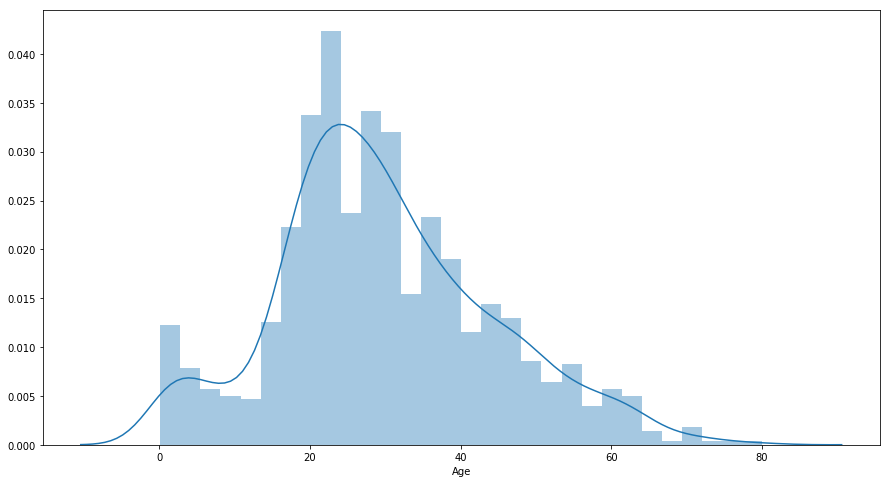

In [26]:
# Plot histogram using seaborn for Age column

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.distplot(dataset.Age, bins =30)

In [11]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Cabin,1014,0.774637
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
Ticket,0,0.000000


# <center>Imputation vs removing data</center>

![alt text](imputation.png "1")

![alt text](missingdata1.png "1")

## <center> Listwise deletion </center>
####  - removes all data for an observation that has one or more missing values
#### Assumptions
* in case MCAR
#### Pros
* very easy to do<br>
#### Cons
* loss of data
* MCAR (Missing Completely at Random) are typically rare to support <br>
* produce biased parameters and estimates

In [59]:
#listwise deletion in MCAR case

display(complete_data1)
display(incomplete_data1)
incomplete_data1.dropna(inplace=True)
display(incomplete_data1)

#listwise deletion with threshold
#incomplete_data1.dropna(thresh=2, inplace=True)


,Age,IQ score
0,25,133
1,26,121
2,29,91
3,30,105
4,30,110
5,31,98
6,44,118
7,46,93
8,48,141
9,51,104


,Age,IQ score
0,25,NaN
1,26,121.0
2,29,91.0
3,30,NaN
4,30,110.0
5,31,NaN
6,44,118.0
7,46,93.0
8,48,NaN
9,51,NaN


,Age,IQ score
1,26,121.0
2,29,91.0
4,30,110.0
6,44,118.0
7,46,93.0
10,51,116.0


In [60]:
#listwise deletion in MAR case

display(complete_data1)
display(incomplete_data2)
incomplete_data2.dropna(inplace=True)
display(incomplete_data2)

,Age,IQ score
0,25,133
1,26,121
2,29,91
3,30,105
4,30,110
5,31,98
6,44,118
7,46,93
8,48,141
9,51,104


,Age,IQ score
0,25,NaN
1,26,NaN
2,29,NaN
3,30,NaN
4,30,NaN
5,31,NaN
6,44,118.0
7,46,93.0
8,48,141.0
9,51,104.0


,Age,IQ score
6,44,118.0
7,46,93.0
8,48,141.0
9,51,104.0
10,51,116.0
11,54,97.0


In [55]:
#listwise deletion in MNAR case

display(complete_data1)
display(incomplete_data3)
incomplete_data3.dropna(inplace=True)
display(incomplete_data3)

,Age,IQ score
0,25,133
1,26,121
2,29,91
3,30,105
4,30,110
5,31,98
6,44,118
7,46,93
8,48,141
9,51,104


,Age,IQ score
0,25,133.0
1,26,121.0
2,29,NaN
3,30,NaN
4,30,110.0
5,31,NaN
6,44,118.0
7,46,NaN
8,48,141.0
9,51,NaN


,Age,IQ score
0,25,133.0
1,26,121.0
4,30,110.0
6,44,118.0
8,48,141.0
10,51,116.0


# <center> Pairwise deletion </center>

# <center> Column deletion </center>

### Hints

* be careful about the reason of missing data
* try to understand why those data are missing (e.g. coupons)

### Pros

* very easy to do <br>

### Cons

* the threshold of removal depends on the variable 
* loss of data

In [ ]:
#Column deletion

del mydata.column_name
mydata.drop('column_name', axis=1, inplace=True)

#Column deletion with threshold
mydata.dropna('column_name', axis=1, thresh=4, inplace=True)

# <center> Imputation using mean/median values</center>

### Assumptions

* used with numeric data

### Pros

* easy and fast to do 
* mean imputation has some attractive properties for univariate analysis

### Cons

* doesn’t factor the correlations between features (works on the column level, becomes problematic for multivariate analysis)
* give poor results on encoded categorical features
* not very accurate
* doesn’t account for the uncertainty in the imputations (?)
* bad results because of outliers (mean)
* the variability in the data is reduced (the standard deviations and the variance estimates tend to be underestimated)
* causes biased estimates
* the magnitude of the covariances and correlation decreases by restricting the variability

### Hints
* For missings on multi-item questionnaires, mean/median imputation can be applied at the item level. One option is to impute the missing item scores with the item mean for each item.

In [ ]:
# imputation 
mydata['income'].fillna((mydata['income'].mean()), inplace=True)

# imputation by imputer
from sklearn.preprocessing import Imputer
values = mydata.values
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
transformed_values = imputer.fit_transform(values)

In [29]:
# Mean imputation 
train['Age'].fillna((train['Age'].mean()), inplace=True)

# Fill missing values in Age feature with each sex’s mean value of Age 
train['Age'].fillna(train.groupby('Sex')['Age'].transform("mean"), inplace=True)

# Fill missing values in Age feature with each sex’s median value of Age 
train['Age'].fillna(train.groupby('Sex')['Age'].transform("median"), inplace=True)

In [145]:
import sklearn.datasets
from sklearn.datasets import fetch_california_housing
import random
random.seed(0)

In [153]:
#Fetching the dataset
import pandas as pd
dataset = fetch_california_housing()
train, target = pd.DataFrame(dataset.data), pd.DataFrame(dataset.target)
train.columns = ['0','1','2','3','4','5','6','7']
train.insert(loc=len(train.columns), column='target', value=target)

#Randomly replace 40% of the first column with NaN values
column = train['0']
print(column.size)
missing_pct = int(column.size * 0.4)
i = [random.choice(range(column.shape[0])) for _ in range(missing_pct)]
column[i] = np.NaN
print(column.shape[0])

20640
20640


In [154]:
#Imputing mean

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(train)
imputed_train_df = imp_mean.transform(train)

#showing changes
display(pd.DataFrame(data=imputed_train_df).head(11))
display(train.head(11))

,0,1,2,3,4,5,6,7,8
0,8.325200,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.301400,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.257400,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3.869512,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.846200,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,3.869512,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.659100,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.120000,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.080400,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.691200,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


,0,1,2,3,4,5,6,7,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,NaN,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,NaN,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [132]:
#imputing mean
train['0'].fillna((train['0'].mean()), inplace=True)

#showing both data frames
display(train.head(11))
display(pd.DataFrame(data=imputed_train_df).head(11))

,0,1,2,3,4,5,6,7,target
0,3.87794,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.30140,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,3.87794,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.64310,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.87794,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.03680,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.65910,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.87794,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,3.87794,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.69120,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


,0,1,2,3,4,5,6,7,8
0,3.87794,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.30140,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,3.87794,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.64310,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.87794,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.03680,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.65910,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.87794,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,3.87794,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.69120,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


# <center>Linear regression imputation</center>

#### Pros
* implies a correlection between variables

#### Cons
* if there is no correlation between attributes with missing data and other attributes in the data set, then the model will be bias for predicting missing values

#### Hints
* stochastic regression imputation aims to reduce the bias by an extra step of augmenting each predicted score with a residual term

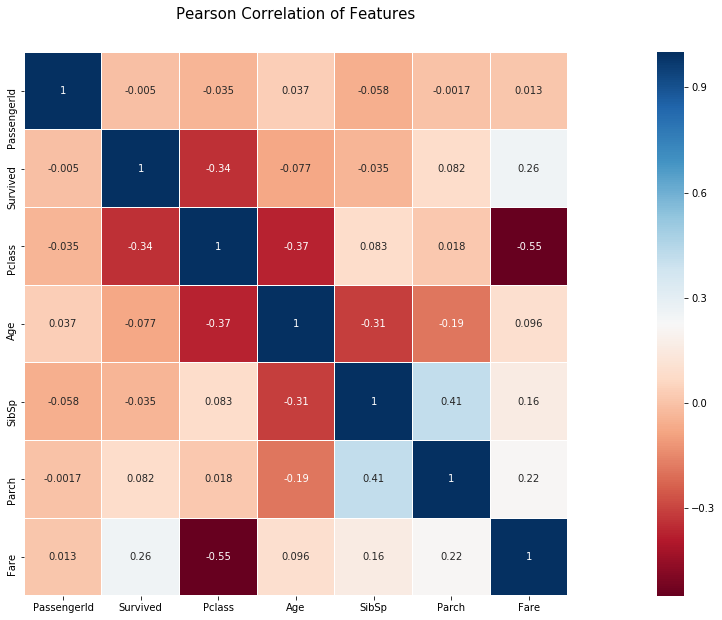

In [15]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
# Note that the categorical features have been neglected in the
# correlation matrix.

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
data = train[['Pclass','SibSp','Parch','Fare','Age']]

#Step-1: Split the dataset that contains the missing values and no missing values are test and train respectively.
x_train = data[data['Age'].notnull()].drop(columns='Age')
y_train = data[data['Age'].notnull()]['Age']
x_test = data[data['Age'].isnull()].drop(columns='Age')
y_test = data[data['Age'].isnull()]['Age']

#Step-2: Train the machine learning algorithm
linreg.fit(x_train, y_train)

#Step-3: Predict the missing values in the attribute of the test data.
predicted = linreg.predict(x_test)

In [27]:
# eliminate negative age
predicted[predicted<0]=np.mean(predicted[predicted>0])

In [11]:
#Step-4: Let’s obtain the complete dataset by combining with the target attribute.
train.Age[train.Age.isnull()] = predicted
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# <center> Imputation using most frequent or zero/constant Values</center>

#### Pros
* works well with categorical features

#### Cons
* doesn’t factor the correlations between features
* introduce bias in the data

In [133]:
#Fetching the dataset
import pandas as pd
dataset = fetch_california_housing()
train, target = pd.DataFrame(dataset.data), pd.DataFrame(dataset.target)
train.columns = ['0','1','2','3','4','5','6','7']
train.insert(loc=len(train.columns), column='target', value=target)
random.seed(0)

#Randomly replace 40% of the first column with NaN values
column = train['0']
print(column.size)
missing_pct = int(column.size * 0.4)
i = [random.choice(range(column.shape[0])) for _ in range(missing_pct)]
column[i] = np.NaN
print(column.shape[0])

20640
20640


In [134]:
# imputation with Imputer

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='most_frequent')
imp_mean.fit(train)
imputed_train_df = imp_mean.transform(train)

In [135]:
#imputing mean
train['0'].fillna((train['0'].mean()), inplace=True)

In [136]:
# showing difference

display(pd.DataFrame(imputed_train_df).head(11))
display(train.head(11))

,0,1,2,3,4,5,6,7,8
0,3.1250,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,3.1250,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.1250,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1250,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,3.1250,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


,0,1,2,3,4,5,6,7,target
0,3.87794,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.30140,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,3.87794,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.64310,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.87794,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.03680,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.65910,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.87794,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,3.87794,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.69120,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


# <center> Imputation Using k-NN </center>

#### Pros
* can predict both discrete attributes (the most frequent value among the k nearest neighbors) and continuous attributes (the mean among the k nearest neighbors)
* simple to understand and easy to implement
* non-parametric nature of KNN gives it an edge in certain settings where the data may be highly “unusual”

#### Cons
* it becomes time-consuming when analyzing large datasets
* the accuracy of KNN can be severely degraded with high-dimensional data because there is little difference between the nearest and farthest neighbor
* k-NN is quite sensitive to outliers in the data

In [128]:
# Load Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Concatenate train & test
train_objs_num = len(train)
y = train['Survived']
dataset = pd.concat(objs=[train.drop(columns=['Survived']), test], axis=0)

In [129]:
train = train.dropna(subset=['Embarked'])

In [130]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()
le.fit(train['Name'])
LabelEncoder()
list(le.classes_)
train['Name'] = le.transform(train['Name']) 

le1 = preprocessing.LabelEncoder()
le1.fit(train['Sex'])
LabelEncoder()
train['Sex'] = le1.transform(train['Sex'])

le2 = preprocessing.LabelEncoder()
le2.fit(train['Embarked'])
LabelEncoder()
train['Embarked'] = le2.transform(train['Embarked']) 

In [131]:
train1 = train.drop(['Cabin','Ticket'], axis=1)

In [132]:
from fancyimpute import KNN

#We use the train dataframe from Titanic dataset
#fancy impute removes column names.
train_cols = list(train1)

# Use 5 nearest rows which have a feature to fill in each row's
# missing features
train1 = pd.DataFrame(KNN(k=5).fit_transform(train1))
train1.columns = train_cols

Imputing row 1/889 with 0 missing, elapsed time: 0.157
Imputing row 101/889 with 1 missing, elapsed time: 0.158
Imputing row 201/889 with 1 missing, elapsed time: 0.158
Imputing row 301/889 with 1 missing, elapsed time: 0.159
Imputing row 401/889 with 0 missing, elapsed time: 0.160
Imputing row 501/889 with 0 missing, elapsed time: 0.161
Imputing row 601/889 with 1 missing, elapsed time: 0.162
Imputing row 701/889 with 0 missing, elapsed time: 0.162
Imputing row 801/889 with 0 missing, elapsed time: 0.163


In [135]:
train1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,108.0,1.0,22.000000,1.0,0.0,7.2500,2.0
1,2.0,1.0,1.0,190.0,0.0,38.000000,1.0,0.0,71.2833,0.0
2,3.0,1.0,3.0,353.0,0.0,26.000000,0.0,0.0,7.9250,2.0
3,4.0,1.0,1.0,272.0,0.0,35.000000,1.0,0.0,53.1000,2.0
4,5.0,0.0,3.0,15.0,1.0,35.000000,0.0,0.0,8.0500,2.0
5,6.0,0.0,3.0,553.0,1.0,19.132359,0.0,0.0,8.4583,1.0
6,7.0,0.0,1.0,514.0,1.0,54.000000,0.0,0.0,51.8625,2.0
7,8.0,0.0,3.0,623.0,1.0,2.000000,3.0,1.0,21.0750,2.0
8,9.0,1.0,3.0,411.0,0.0,27.000000,0.0,2.0,11.1333,2.0
9,10.0,1.0,2.0,575.0,0.0,14.000000,1.0,0.0,30.0708,0.0


In [157]:
dataset1 = fetch_california_housing()
train1 = pd.DataFrame(dataset1.data)

In [155]:
#first

import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(train.values, k=30)

In [158]:
display(pd.DataFrame(imputed_training).head(11))
display(train1.head(11))

,0,1,2,3,4,5,6,7,8
0,8.325200,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.301400,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.257400,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3.669610,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.846200,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,3.352048,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.659100,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.120000,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.080400,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.691200,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [ ]:
# second 
from fancyimpute import KNN    

# Use 5 nearest rows which have a feature to fill in each row's missing features
knnOutput = KNN(k=5).complete(mydata)

# <center> Multiple imputation </center>

#### Assumptions
* MAR or MNAR case

#### Pros
* the variables that are related to missingness, can be included
* deal with the problem of increased noise due to imputation
* flexible and can be used in a wide variety of scenarios (MAR and MNAR)

#### Cons

# <center> Multiple imputation steps </center>


1. **Imputation** – Similar to single imputation, missing values are imputed. However, the imputed values are drawn m times from a distribution rather than just once. At the end of this step, there should be m completed datasets.
2. **Analysis** – Each of the m datasets is analyzed. At the end of this step there should be m analyses.
3. **Pooling** – The m results are consolidated into one result by calculating the mean, variance, and confidence interval of the variable of concern.

![alt text](MICE.png "1")

![alt text](auxvar.png "1")

![alt text](var.png "1")

# <center> Multiple Imputation by Chained Equations (MICE) </center>

#### Assumptions
* only in MAR case

In [105]:
# Load Data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Concatenate train & test
train_objs_num = len(train)
y = train['Survived']
dataset = pd.concat(objs=[train.drop(columns=['Survived']), test], axis=0)

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [107]:
train = train.dropna(subset=['Embarked'])

In [108]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

le = preprocessing.LabelEncoder()
le.fit(train['Name'])
LabelEncoder()
list(le.classes_)
train['Name'] = le.transform(train['Name']) 

le1 = preprocessing.LabelEncoder()
le1.fit(train['Sex'])
LabelEncoder()
train['Sex'] = le1.transform(train['Sex'])

le2 = preprocessing.LabelEncoder()
le2.fit(train['Embarked'])
LabelEncoder()
train['Embarked'] = le2.transform(train['Embarked']) 

In [110]:
train1 = train.drop(['Cabin','Ticket'], axis=1)

In [111]:
train1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,7.2500,2
1,2,1,1,190,0,38.0,1,0,71.2833,0
2,3,1,3,353,0,26.0,0,0,7.9250,2
3,4,1,1,272,0,35.0,1,0,53.1000,2
4,5,0,3,15,1,35.0,0,0,8.0500,2
5,6,0,3,553,1,NaN,0,0,8.4583,1
6,7,0,1,514,1,54.0,0,0,51.8625,2
7,8,0,3,623,1,2.0,3,1,21.0750,2
8,9,1,3,411,0,27.0,0,2,11.1333,2
9,10,1,2,575,0,14.0,1,0,30.0708,0


In [112]:
from fancyimpute import IterativeImputer
#We use the train dataframe from Titanic dataset
#fancy impute removes column names.
train_cols = list(train1)
# Use MICE to fill in each row's missing features
train1 = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(train1))
train1.columns = train_cols

In [ ]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(train.values)

# <center>What can we do with missing values?</center>
<br>
 <center> 1. Drop missing values</center>
 <center> 2. Fill missing values with test statistic</center>
 <center> 3. Predict missing value with a machine learning algorithm</center>

In [2]:
from ipywidgets import interact
 
def my_function(x):
    return x
 
# create a slider
interact(my_function, x=20)

interactive(children=(IntSlider(value=20, description='x', max=60, min=-20), Output()), _dom_classes=('widget-…

<function __main__.my_function(x)>

# The end